# Aula 5 - Hipóteses mais complexas e regularização

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Hipóteses mais complexas
- 2) Regularização

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

____
____
____

_____

## 1) Hipóteses mais complexas

Muitas vezes, temos dados que simplesmente não se ajustam às hipóteses simples, lineares, que conhecemos até o momento.

Quando isso acontece, é muito provável que soframos **underfitting**, pois uma forma funcional demasiadamente simples de uma hipótese pode não ser capaz de capturar o comportamento de uma função teórica $\mathcal{F}$ mais complexa, conforme refletido pela amostra.

Nestes casos, a solução é simples: basta escolhermos hipóteses mais complexas!

Pra começar nosso estudo, vamos utilizar dados bem simples do próprio sklearn (submódulo [datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)):


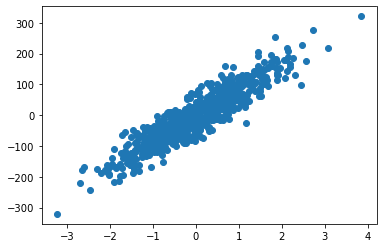

In [3]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 700, n_features = 1,
                       noise = 35, tail_strength = 50,
                       random_state = 42)

plt.scatter(X, y)
plt.show()

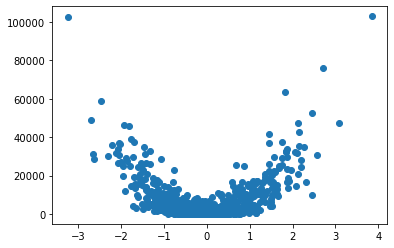

In [4]:
X, y = make_regression(n_samples = 700, n_features = 1,
                       noise = 35, tail_strength = 50,
                       random_state = 42)

y = y**2

plt.scatter(X, y)
plt.show()

Podemos fazer uma regressão linear...

Intercepto (b0): 7279.765399809274
Demais parâmetros (b1, ..., bn): [1303.44379459]

Modelo treinado:


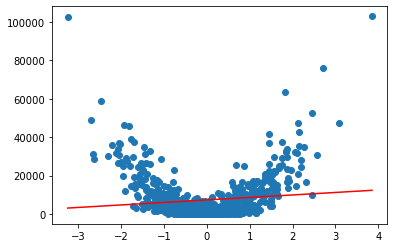

Métricas de treino:

R^2: 0.01
MAE: 7181.56
RMSE: 10802.78

Métricas de teste:

R^2: -0.05
MAE: 8121.31
RMSE: 13395.52


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

# como temos uma unica feature, dá pra plotar o modelo (hipótese final)
print("\nModelo treinado:")

x_plot = np.linspace(X.min(), X.max(), 1000)

y_plot = reg_lin.intercept_ + reg_lin.coef_[0]*x_plot

plt.plot(x_plot, y_plot, color="red")

# dados
plt.scatter(X, y)

plt.show()

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("Métricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

Naturalmente, temos métricas bem ruins, dada a escolha ruim de hipótese!

Hipótese atual:

$$f_{h, \  \vec{b}}(x) = b_0 + b_1x$$

Vamos fazer algo melhor: como nossos dados são aproximadamente quadráticos, faria sentido escolher uma **hipótese quadrática**, não é mesmo? Isto é,

$$f_{h, \  \vec{b}}(x) = b_0 + b_1x + b_2x^2$$

E é aqui que entra um dos aspectos mais importantes de um modelo linear como a regressão linear: **o modelo é linear nos parâmetros, não necessariamente nas features!**

Ou seja, o termo quadrado que incluímos **pode ser considerado como uma nova feature linear**. Para ver isso, basta definir $z \equiv x^2$, que voltamos a ter uma hipótese linear, mas agora em duas variáveis:

$$f_{h, \  \vec{b}}(x, z) = b_0 + b_1x + b_2z$$

Ou seja, ainda temos uma regressão linear (múltipla, agora).

E isso é verdade para **qualquer** combinação de features que possamos criar!

Assim, para criarmos um modelo quadrático para nossos dados, bastaria criarmos uma nova feature $z = x^2$, e passar apenas esta nova feature para o  modelo de regressão linear **simples**. Isso equivale a usar uma hipótese $$f_{h, \  \vec{b}}(z) = b_0 + b_1z = b_0 + b_1x^2$$

Vejamos:

Intercepto (b0): 934.4564684580118
Demais parâmetros (b1, ..., bn): [6661.31189456]

Modelo treinado:


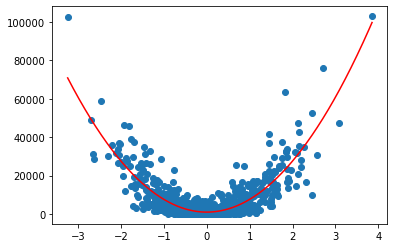

Métricas de treino:

R^2: 0.73
MAE: 3581.64
RMSE: 5636.74

Métricas de teste:

R^2: 0.73
MAE: 4326.26
RMSE: 6778.47


In [6]:
# isso a feature z = x^2
# note: isso é um PRE PROCESSAMENTO DOS DADOS!!! nao to mexendo em NADA do estimador
Z = X**2

# ======================================

from sklearn.model_selection import train_test_split

# note que aqui tamos usando o Z ao inves do X
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=42)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

# como temos uma unica feature, dá pra plotar o modelo (hipótese final)
print("\nModelo treinado:")

x_plot = np.linspace(X.min(), X.max(), 1000)

y_plot = reg_lin.intercept_ + reg_lin.coef_[0]*(x_plot**2)

plt.plot(x_plot, y_plot, color="red")

# dados
plt.scatter(X, y)

plt.show()

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("Métricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

Agora sim, um modelo beeem melhor!!

E se quisermos usar a hipótese quadrática mais completa, com ambos os termos linear e quadrático? (Isto é, $f_{h, \  \vec{b}}(x) = b_0 + b_1x + b_2x^2$)

Bem simples: basta passarmos as duas features pro sklearn:

In [7]:
X_df = pd.DataFrame(X, columns=["X"])

In [8]:
X_df

,X
0,-1.197878
1,-1.024388
2,-0.269407
3,0.384065
4,-0.107030
...,...
695,-0.825497
696,0.081874
697,0.012592
698,1.882024


In [9]:
X_df["Z"] = X_df["X"]**2

In [10]:
X_df

,X,Z
0,-1.197878,1.434911
1,-1.024388,1.049370
2,-0.269407,0.072580
3,0.384065,0.147506
4,-0.107030,0.011455
...,...,...
695,-0.825497,0.681446
696,0.081874,0.006703
697,0.012592,0.000159
698,1.882024,3.542016


Intercepto (b0): 927.9689134531236
Demais parâmetros (b1, ..., bn): [ -65.6131123  6667.88666831]

Modelo treinado:


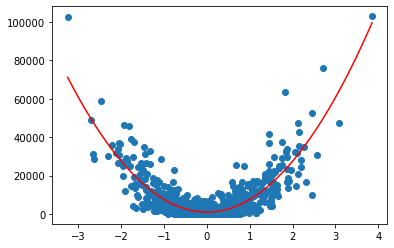

Métricas de treino:

R^2: 0.73
MAE: 3581.93
RMSE: 5636.39

Métricas de teste:

R^2: 0.73
MAE: 4331.75
RMSE: 6772.88


In [11]:
# ======================================

from sklearn.model_selection import train_test_split

# note que aqui tamos usando o X_df (com as duas variaveis) ao inves do X
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

# como temos uma unica feature, dá pra plotar o modelo (hipótese final)
print("\nModelo treinado:")

x_plot = np.linspace(X.min(), X.max(), 1000)

y_plot = reg_lin.intercept_ + reg_lin.coef_[0]*(x_plot) + reg_lin.coef_[1]*(x_plot**2)

plt.plot(x_plot, y_plot, color="red")

# dados
plt.scatter(X, y)

plt.show()

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("Métricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

No geral, dá pra ir aumentando a ordem dos polinomios criando features de ordem maior uma a uma:

In [12]:
X_df["A"] = X_df["X"]**3
X_df["B"] = X_df["X"]**4

In [13]:
X_df

,X,Z,A,B
0,-1.197878,1.434911,-1.718849,2.058971e+00
1,-1.024388,1.049370,-1.074962,1.101177e+00
2,-0.269407,0.072580,-0.019554,5.267863e-03
3,0.384065,0.147506,0.056652,2.175810e-02
4,-0.107030,0.011455,-0.001226,1.312284e-04
...,...,...,...,...
695,-0.825497,0.681446,-0.562531,4.643681e-01
696,0.081874,0.006703,0.000549,4.493523e-05
697,0.012592,0.000159,0.000002,2.514399e-08
698,1.882024,3.542016,6.666161,1.254588e+01


Intercepto (b0): 939.9766852933708
Demais parâmetros (b1, ..., bn): [  26.65263951 6632.87907468  -36.92940233   10.0586674 ]

Modelo treinado:


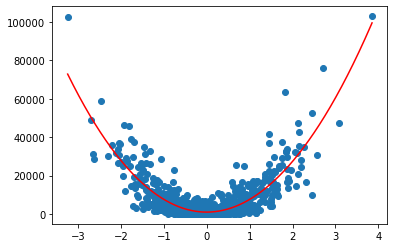

Métricas de treino:

R^2: 0.73
MAE: 3581.20
RMSE: 5636.02

Métricas de teste:

R^2: 0.73
MAE: 4321.62
RMSE: 6722.47


In [14]:
# ======================================

from sklearn.model_selection import train_test_split

# note que aqui tamos usando o X_df (com as duas variaveis) ao inves do X
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

# como temos uma unica feature, dá pra plotar o modelo (hipótese final)
print("\nModelo treinado:")

x_plot = np.linspace(X.min(), X.max(), 1000)

y_plot = (reg_lin.intercept_ + reg_lin.coef_[0]*(x_plot)
          + reg_lin.coef_[1]*(x_plot**2) + reg_lin.coef_[2]*(x_plot**3)
          + reg_lin.coef_[3]*(x_plot**4))

plt.plot(x_plot, y_plot, color="red")

# dados
plt.scatter(X, y)

plt.show()

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("Métricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

O procedimento acima é bem manual. Pra nossa sorte, o sklearn existe, e uma de suas muitas ferramentas especiais para machine learning (no caso, pré-processamento) é o [polynomial features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), que permite a criação de toda as combinações polinomiais de features automaticamente!

O PolynomialFeatures é um exemplo de **transformer** do sklearn - um método cujo objetivo é aplicar alguma **transformação** aos dados. Veremos vários outros exemplos de transformers durante o curso.

Em particular, todos os transformers se comportam como se fossem "estimadores", no sentido de que eles devem 
ser "ajustados" aos dados -- por isso, eles também têm o método `.fit()` -- que ajusta o transformer aos dados; além do método `.transform()`, que efetivamente transforma os dados. Existe também o `.fit_transform()`, que faz as duas coisas ao mesmo tempo -- mas vamos evitar de usá-lo, por motivos que ficarão claros no futuro próximo.

Lembre-se de fitar o transformador sempre nos dados de treino, apenas! Neste caso, não faz muita diferença, mas, para nos acostumarmos a isso, vamos fazer aqui também!

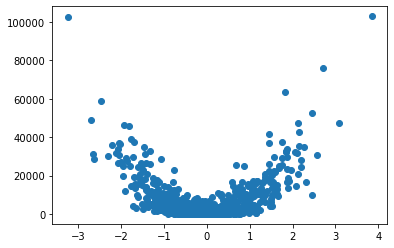

In [15]:
X, y = make_regression(n_samples = 700, n_features = 1,
                       noise = 35, tail_strength = 50,
                       random_state = 42)

y = y**2

plt.scatter(X, y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False) #Instanciar

# pra gente se acostumar: fit só em dados de treino!!!!
pf.fit(X_train)

PolynomialFeatures(include_bias=False)

In [17]:
vars(pf)

{'degree': 2,
 'interaction_only': False,
 'include_bias': False,
 'order': 'C',
 'n_features_in_': 1,
 '_min_degree': 0,
 '_max_degree': 2,
 'n_output_features_': 2,
 '_n_out_full': 2}

In [18]:
pf.n_features_in_

1

In [19]:
pf.n_output_features_

2

In [20]:
# das duas features que teremos depois da transformação
# a primeira tem grau 1
# a segunda tem grau 2

pf.powers_

array([[1],
       [2]], dtype=int64)

In [21]:
X_train_transf = pf.transform(X_train)
X_test_transf = pf.transform(X_test)

In [22]:
X_train_transf

array([[ 0.51378595,  0.263976  ],
       [ 0.2597225 ,  0.06745578],
       [-0.11473644,  0.01316445],
       ...,
       [ 0.71095997,  0.50546408],
       [ 1.1593298 ,  1.34404559],
       [ 0.47323762,  0.22395385]])

In [23]:
X_test_transf

array([[ 1.47789404e+00,  2.18417081e+00],
       [ 6.90143992e-01,  4.76298729e-01],
       [ 8.23170584e-01,  6.77609810e-01],
       [-3.84555544e-01,  1.47882967e-01],
       [-5.95253561e-02,  3.54326801e-03],
       [-6.77161712e-01,  4.58547984e-01],
       [-8.97254371e-01,  8.05065407e-01],
       [-8.60413365e-01,  7.40311159e-01],
       [ 5.29804178e-01,  2.80692467e-01],
       [-4.26881070e-01,  1.82227448e-01],
       [ 3.10907566e-01,  9.66635143e-02],
       [-7.92872832e-01,  6.28647328e-01],
       [ 1.52302986e+00,  2.31961994e+00],
       [-4.01220472e-01,  1.60977867e-01],
       [-8.02277269e-01,  6.43648817e-01],
       [ 3.26927374e-01,  1.06881508e-01],
       [ 1.30740577e-01,  1.70930985e-02],
       [-2.30934530e-01,  5.33307572e-02],
       [-7.73789199e-01,  5.98749725e-01],
       [ 3.24083969e-01,  1.05030419e-01],
       [ 1.84633859e-01,  3.40896617e-02],
       [-5.53649305e-01,  3.06527553e-01],
       [-5.24520266e-01,  2.75121510e-01],
       [ 8.

Tudo numa unica célula:

Número original de features: 1
Número de features no espaço transformado: 2


Intercepto (b0): 927.9689134531245
Demais parâmetros (b1, ..., bn): [ -65.6131123  6667.88666831]

Modelo treinado:


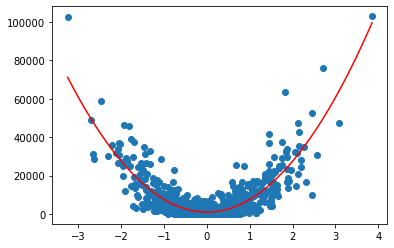

Métricas de treino:

R^2: 0.73
MAE: 3581.93
RMSE: 5636.39

Métricas de teste:

R^2: 0.73
MAE: 4331.75
RMSE: 6772.88


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================================
# passo adicional: criando features polinomiais
# pra deixar a hipotese mais complexa (regressão linear em espaço polinomial)

from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False)

# pra gente se acostumar: fit só em dados de treino!!!!
pf.fit(X_train)

print(f"Número original de features: {pf.n_features_in_}")
print(f"Número de features no espaço transformado: {pf.n_output_features_}\n\n")

# redefinindo as features de treino e de teste
X_train = pf.transform(X_train)
X_test = pf.transform(X_test)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

# como temos uma unica feature, dá pra plotar o modelo (hipótese final)
print("\nModelo treinado:")

x_plot = np.linspace(X.min(), X.max(), 1000)

# pra plotar a hipotese automaticamente
# y = bo + b1*x^1 + b2*x^2 + .... + bn*x^n

# y_plot = reg_lin.intercept_

# for i in range(len(reg_lin.coef_)):
    
#     y_plot = y_plot + reg_lin.coef_[i]*(x_plot**(i+1))

y_plot = reg_lin.intercept_

for n, b_n in enumerate(reg_lin.coef_):
    
    y_plot = y_plot + b_n*(x_plot**(n+1))

plt.plot(x_plot, y_plot, color="red")

# dados
plt.scatter(X, y)

plt.show()

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("Métricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

### Então podemos pensar que quanto mais features melhor será o nosso modelo?

**Maldição da dimensionalidade**

Este fenômeno afirma que com um número fixo de amostras de treinamento, o poder preditivo médio (esperado) de um classificador ou regressor aumenta primeiro à medida que o número de dimensões ou características utilizadas aumenta, mas além de uma certa dimensionalidade, começa a deteriorar-se em vez de melhorar de forma constante. Este aumento na dimensionalidade do problema pode se refletir no overfitting de um modelo. Vamos ver isso claramente?

In [ ]:
# prototipo pra salvar resultados

# resultados = {"num_features" : [1, 2, 3],
#               "mae_train" : [425432, 454253324, 435645654676798],
#               "mae_test" : [42424325, 5434234253, 435645654676798]}

# pd.DataFrame(resultados)

Prototipo do que fizemos abaixo

In [26]:
resultados = {"num_features" : [],
              "mae_train" : [],
              "mae_test" : []}

In [27]:
resultados["num_features"].append(4)
resultados["mae_train"].append(5453435)
resultados["mae_test"].append(45345345)

In [28]:
resultados

{'num_features': [4], 'mae_train': [5453435], 'mae_test': [45345345]}

Agora sim:

In [29]:
# dicionario de resultados do experimento
resultados = {"num_features" : [],
              "mae_train" : [],
              "mae_test" : []}

for grau in range(1, 16):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ======================================

    pf = PolynomialFeatures(degree=grau, include_bias=False)

    pf.fit(X_train)

    print(f"Número original de features: {pf.n_features_in_}")
    print(f"Número de features no espaço transformado: {pf.n_output_features_}\n\n")

    # redefinindo as features de treino e de teste
    X_train = pf.transform(X_train)
    X_test = pf.transform(X_test)

    # ======================================

    reg_lin = LinearRegression()

    reg_lin.fit(X_train, y_train)

    # ======================================

    # predições de treino
    y_pred_train = reg_lin.predict(X_train)

    print("Métricas de treino:\n")
    print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
    print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

    # predições de teste
    y_pred_test = reg_lin.predict(X_test)

    print("\nMétricas de teste:\n")
    print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")
    
    print()
    print("#"*80)
    print()
    
    # ======================================
    
    resultados["num_features"].append(pf.n_output_features_)
    resultados["mae_train"].append(mean_absolute_error(y_train, y_pred_train))
    resultados["mae_test"].append(mean_absolute_error(y_test, y_pred_test))

Número original de features: 1
Número de features no espaço transformado: 1


Métricas de treino:

R^2: 0.01
MAE: 7181.56
RMSE: 10802.78

Métricas de teste:

R^2: -0.05
MAE: 8121.31
RMSE: 13395.52

################################################################################

Número original de features: 1
Número de features no espaço transformado: 2


Métricas de treino:

R^2: 0.73
MAE: 3581.93
RMSE: 5636.39

Métricas de teste:

R^2: 0.73
MAE: 4331.75
RMSE: 6772.88

################################################################################

Número original de features: 1
Número de features no espaço transformado: 3


Métricas de treino:

R^2: 0.73
MAE: 3581.40
RMSE: 5636.21

Métricas de teste:

R^2: 0.73
MAE: 4325.38
RMSE: 6752.01

################################################################################

Número original de features: 1
Número de features no espaço transformado: 4


Métricas de treino:

R^2: 0.73
MAE: 3581.20
RMSE: 5636.02

Métricas de teste:

R^2: 0.73

In [30]:
# dataframe de resultados do experimento

df_resultados = pd.DataFrame(resultados)

In [31]:
df_resultados

,num_features,mae_train,mae_test
0,1,7181.560933,8121.313244
1,2,3581.933778,4331.752527
2,3,3581.400263,4325.382292
3,4,3581.195690,4321.621979
4,5,3579.894828,4340.232799
5,6,3581.464832,4408.618829
6,7,3544.409828,5078.571268
7,8,3543.895806,5241.180968
8,9,3538.829341,6027.308969
9,10,3541.570521,6785.407158


In [32]:
df_resultados.describe()

,num_features,mae_train,mae_test
count,15.000000,15.000000,15.000000
mean,8.000000,3782.207315,18996.528081
std,4.472136,941.560606,37599.406203
min,1.000000,3436.796916,4321.621979
25%,4.500000,3540.199931,4374.425814
50%,8.000000,3545.715130,5241.180968
75%,11.500000,3581.297976,9749.636556
max,15.000000,7181.560933,147068.338783


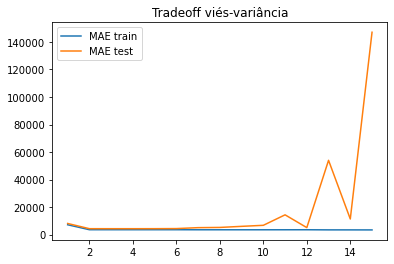

In [33]:
plt.title("Tradeoff viés-variância")

plt.plot(df_resultados["num_features"], df_resultados["mae_train"], label="MAE train")
plt.plot(df_resultados["num_features"], df_resultados["mae_test"], label="MAE test")

plt.legend()
plt.show()

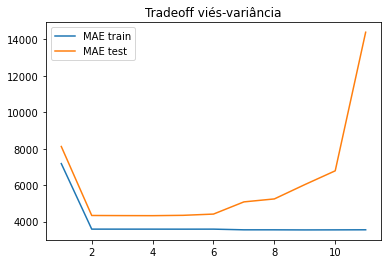

In [34]:
plt.title("Tradeoff viés-variância")

plt.plot(df_resultados[:11]["num_features"], df_resultados[:11]["mae_train"], label="MAE train")
plt.plot(df_resultados[:11]["num_features"], df_resultados[:11]["mae_test"], label="MAE test")

plt.legend()
plt.show()

_____________
_____________
_____________

Agora que já entendemos a técnica em um dataset bem simples, vamos voltar pra um dataset real!

Vamos voltar pros dados da precificação de casas -- ali, o poly_features se mostrará ainda mais útil!

In [35]:
df = pd.read_csv("house_prices.csv")

# incluindo apenas features numericas, jogando fora os NaNs
df = df.select_dtypes(include=np.number).dropna()

X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]

# ======================================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================================
# passo adicional: criando features polinomiais
# pra deixar a hipotese mais complexa (regressão linear em espaço polinomial)

from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=1, include_bias=False)

# pra gente se acostumar: fit só em dados de treino!!!!
pf.fit(X_train)

print(f"Número original de features: {pf.n_features_in_}")
print(f"Número de features no espaço transformado: {pf.n_output_features_}\n\n")

# redefinindo as features de treino e de teste
X_train = pf.transform(X_train)
X_test = pf.transform(X_test)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

Número original de features: 36
Número de features no espaço transformado: 36


Intercepto (b0): -457586.59844777174
Demais parâmetros (b1, ..., bn): [-2.09840235e+02 -6.22245251e+01  4.29203229e-01  1.96542920e+04
  5.07228946e+03  2.86898275e+02  1.25155507e+02  2.64927205e+01
  4.75018636e+00  4.49071348e+00 -3.00319582e+00  6.23770403e+00
  1.03503162e+01  1.39030809e+01  5.09112525e+00  2.93445223e+01
  1.15651290e+04  1.33874840e+03  5.01014376e+03 -1.95544480e+03
 -9.48684978e+03 -2.14750237e+04  4.58715787e+03  4.79391824e+03
 -1.73822466e+01  1.83445528e+04  5.86043038e+00  2.02568027e+01
 -3.14383329e+00  1.18478232e+01  5.86571031e+01  6.69736175e+01
 -6.19269025e+01 -3.91009199e+00 -5.28006128e+00 -1.91225833e+02]

Métricas de treino:

R^2: 0.81
MAE: 22141.31
RMSE: 35608.43

Métricas de teste:

R^2: 0.80
MAE: 23615.83
RMSE: 39852.60


In [37]:
df = pd.read_csv("house_prices.csv")

# incluindo apenas features numericas, jogando fora os NaNs
df = df.select_dtypes(include=np.number).dropna()

X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]

# ======================================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================================
# passo adicional: criando features polinomiais
# pra deixar a hipotese mais complexa (regressão linear em espaço polinomial)

from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False)

# pra gente se acostumar: fit só em dados de treino!!!!
pf.fit(X_train)

print(f"Número original de features: {pf.n_features_in_}")
print(f"Número de features no espaço transformado: {pf.n_output_features_}\n\n")

# redefinindo as features de treino e de teste
X_train = pf.transform(X_train)
X_test = pf.transform(X_test)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

Número original de features: 36
Número de features no espaço transformado: 702


Intercepto (b0): 2555393937.3146234
Demais parâmetros (b1, ..., bn): [-1.53163677e+04  6.17660324e+03 -6.88263797e+02 -1.60978200e+05
 -1.88154939e+06 -1.39902432e+05 -8.64917243e+04  3.05031103e+02
 -2.64382533e+03  1.08438915e+04 -1.08810547e+04 -2.67891774e+03
  9.00224325e+03 -1.78957623e+03 -6.25425400e+00  7.20275994e+03
 -5.45960283e+06 -5.04530634e+06 -6.96965957e+06  4.05289312e+05
  3.58058337e+06 -8.91084892e+05 -3.28631361e+06  4.55319110e+06
  1.55025536e+04  1.36088678e+06  1.37394456e+04  1.22484613e+04
 -6.76802105e+03 -7.18351638e+04  1.46215027e+00 -7.72397416e+04
 -5.65698156e-01 -6.84527731e-02  2.97131012e+04 -2.32740114e+06
  3.22441740e-01 -4.52476707e+00  1.53992061e-02  2.70727094e+00
  4.91257816e+01  6.15953537e+00  1.24617635e+00  1.32232642e-01
 -5.91072623e-01 -4.38475822e-01 -4.20545934e-01  2.09351689e-01
 -2.02765781e-01 -1.06146619e+00  2.61476397e-02  6.75681195e-01
 -4.2

Esete ultimo modelo tinha muuuuuito mais parametros que observações, portanto, aprendeu perfeitamente até mesmo os ruidos da base de treino!!

Com quantas features o modelo final foi construído?

In [38]:
pf.n_output_features_

702

Nossa hipótese é:

$$ f_{H, \vec{b}}(\vec{x}) = b_0 + b_1x_1 + b_2x_2 + \cdots + b_{702} x_{702}$$

Ou seja, temos um modelo **com muitos parâmetros**, ou seja, **muito complexo!**

Com tantos parâmetros assim, há muitos **graus de liberdade** pra que a hipótese se ajuste até às particularidades da base de treino... 

O resultado é evidente: temos um modelo altamente **overfitado**, dado o número enorme de features após o transformer -- e isso porque estamos utilizando apenas features quadráticas, imagine se tivéssemos usado features de grau maior!

É de se imaginar que muitas destas features não deveriam estar aí, não é mesmo?

Oras, uma forma interessante de eliminar features é fazendo o que chamamos de **feature selection**.

A ideia é a seguinte: gostaríamos sim de introduzir features quadráticas, aumentando um pouco a complexidade da hipótese, **mas não tanto!**. 

E é isso que conseguiremos fazer com as técnicas de **regularização**.

Antes, vamos chutar mais o balde...

In [39]:
# uma saida, é limitar a transformação

df = pd.read_csv("house_prices.csv")

# incluindo apenas features numericas, jogando fora os NaNs
df = df.select_dtypes(include=np.number).dropna()

X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]

# ======================================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================================
# passo adicional: criando features polinomiais
# pra deixar a hipotese mais complexa (regressão linear em espaço polinomial)

from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

# pra gente se acostumar: fit só em dados de treino!!!!
pf.fit(X_train)

print(f"Número original de features: {pf.n_features_in_}")
print(f"Número de features no espaço transformado: {pf.n_output_features_}\n\n")

# redefinindo as features de treino e de teste
X_train = pf.transform(X_train)
X_test = pf.transform(X_test)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

Número original de features: 36
Número de features no espaço transformado: 666


Intercepto (b0): 307030437.3414153
Demais parâmetros (b1, ..., bn): [-4.92692760e+04 -7.79539099e+04 -5.62482208e+02 -4.69816946e+05
 -1.95673722e+06 -7.48155690e+03 -5.21312985e+04  2.40130561e+03
 -3.34695892e+03  1.13284682e+04 -1.05003455e+04 -2.59741542e+03
  6.88052118e+03 -2.03175648e+03 -4.36420099e+01  4.84582310e+03
 -4.35519050e+06 -1.82355341e+06 -6.84146744e+06  5.06421979e+05
  3.29471798e+06 -8.80186822e+06 -2.76442332e+06  5.63347328e+06
 -9.69674282e+04  2.22274375e+06  8.89973014e+03  1.11469508e+04
 -1.26799836e+04 -3.85822466e+04 -2.97059437e+00 -5.03261917e+04
  1.08648540e+00 -1.04195426e+00  7.46979505e+04 -1.30609250e+05
 -6.04587506e+00  1.80515250e-02  4.54567521e+01  5.95079539e+01
  5.80272698e+00 -8.73816431e-02  1.72841079e-01 -4.71620503e-01
 -1.50821454e-01 -2.83226699e-01  1.50778188e-01  1.26882758e+00
  6.14217794e-01 -2.44863756e-01 -1.10582169e+00 -3.79950468e+01
 -1.56

In [40]:
df = pd.read_csv("house_prices.csv")

# incluindo apenas features numericas, jogando fora os NaNs
df = df.select_dtypes(include=np.number).dropna()

X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]

# ======================================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================================
# passo adicional: criando features polinomiais
# pra deixar a hipotese mais complexa (regressão linear em espaço polinomial)

from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=3, include_bias=False)

# pra gente se acostumar: fit só em dados de treino!!!!
pf.fit(X_train)

print(f"Número original de features: {pf.n_features_in_}")
print(f"Número de features no espaço transformado: {pf.n_output_features_}\n\n")

# redefinindo as features de treino e de teste
X_train = pf.transform(X_train)
X_test = pf.transform(X_test)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

Número original de features: 36
Número de features no espaço transformado: 9138


Intercepto (b0): -1543523.4658672425
Demais parâmetros (b1, ..., bn): [ 7.11345315e-08  1.12342729e-08  1.01879889e-06 ...  1.41556641e-03
 -5.31294945e-03 -2.77966119e-03]

Métricas de treino:

R^2: 1.00
MAE: 0.00
RMSE: 0.00

Métricas de teste:

R^2: -11.86
MAE: 158852.93
RMSE: 318495.09


O que podemos dizer sobre este modelo?

**Claro overfitting!**

____
____
____

Pra nosso código ficar mais organizado, podemos fazer uma função para a modelagem (depois vcs podem refazer os passos acima com a função, ajuda a organizar o código!)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    
def poly_reg(X, y, degree):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ======================================
    # passo adicional: criando features polinomiais
    # pra deixar a hipotese mais complexa (regressão linear em espaço polinomial)

    pf = PolynomialFeatures(degree=degree, include_bias=False)

    # pra gente se acostumar: fit só em dados de treino!!!!
    pf.fit(X_train)

    print(f"Número original de features: {pf.n_features_in_}")
    print(f"Número de features no espaço transformado: {pf.n_output_features_}")

    # redefinindo as features de treino e de teste
    X_train = pf.transform(X_train)
    X_test = pf.transform(X_test)

    # ======================================

    reg_lin = LinearRegression()

    reg_lin.fit(X_train, y_train)

    # ======================================

    # predições de treino
    y_pred_train = reg_lin.predict(X_train)

    print("\nMétricas de treino:\n")
    print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
    print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

    # predições de teste
    y_pred_test = reg_lin.predict(X_test)

    print("\nMétricas de teste:\n")
    print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

In [42]:
df = pd.read_csv("house_prices.csv")
df = df.select_dtypes(include=np.number).dropna()

X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]

In [43]:
poly_reg(X, y, degree=1)

Número original de features: 36
Número de features no espaço transformado: 36

Métricas de treino:

R^2: 0.81
MAE: 22141.31
RMSE: 35608.43

Métricas de teste:

R^2: 0.80
MAE: 23615.83
RMSE: 39852.60


In [44]:
poly_reg(X, y, degree=2)

Número original de features: 36
Número de features no espaço transformado: 702

Métricas de treino:

R^2: 0.98
MAE: 8254.70
RMSE: 12119.72

Métricas de teste:

R^2: -17.35
MAE: 72760.47
RMSE: 380398.37


In [45]:
poly_reg(X, y, degree=3)

Número original de features: 36
Número de features no espaço transformado: 9138

Métricas de treino:

R^2: 1.00
MAE: 0.00
RMSE: 0.00

Métricas de teste:

R^2: -11.86
MAE: 158852.93
RMSE: 318495.09


_____

## 2) Regularização

Neste ponto, é muito importante que falemos sobre **regularização**.

O objetivo da regularização é **diminuir a complexidade** de modelos, de modo a evitar que particularidades da base de treino (ruídos) sejam aprendidos (ou seja, evitar overfitting!)

Uma outra forma de enxergar regularização: **diminuição do espaço de hipóteses!**

<img src=https://curso-r.github.io/main-intro-ml/slides/static/img/erro_treino_erro_teste.png width=500>

Regularização: problema de otimização VINCULADO!! ou seja, com restrições.

problema de otimização: otimização da função de custo, que é o objetivo da aprendizagem, pra determinar o $\hat{\vec{b}}$

restrições: é o que determina se temos L1 (lasso) ou L2 (ridge)

### Regressão linear (sem regularização)

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/5408b0a7-85f3-4824-ad68-44867121ecb9.png width=800>

### L1 (Lasso)

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/acabe9da-07ba-4337-b467-dd2701a40cc8.png width=900>

### L2 (Ridge)

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/46eda310-fb2f-498b-b455-593183de1dd7.png width=900>

Para saber como relacionar $t$ com $\lambda$, veja [este post](https://stats.stackexchange.com/questions/259177/expressing-the-lasso-regression-constraint-via-the-penalty-parameter) ou então [este](https://stats.stackexchange.com/questions/90648/kkt-versus-unconstrained-formulation-of-lasso-regression) -- discussões bem matemáticas!

Observações importantes:

- $\lambda$ é um parâmetro que controla a "força" da regularização<br><br>
- **L1 pode zerar coeficientes** - faz feature selection<br><br>
- **L2 apenas diminui o tamanho de coeficientes** - não faz feature selection<br><br>

<img src=https://ugc.futurelearn.com/uploads/assets/2b/fe/2bfe399e-503e-4eae-9138-a3d7da738713.png width=900>



Geometricamente:

<img src=https://www.astroml.org/_images/fig_lasso_ridge_1.png width=800>

No sklearn, é possível fazer um modelo de regressão linear regularizado facilmente com as classes respectivas:

- [Regularização L2/Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

- [Regularização L1/Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)

Há, no sklearn, também uma implementação para um tipo de regularização conhecida como **Elastic Net**:

<img src=https://miro.medium.com/max/761/1*nrWncnoJ4V_BkzEf1pd4MA.png width=900>

A classe se chama [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet)



Vamos utilizar regularização no dataset das casas, juntamente com as features polinomiais:

> **IMPORTANTE**: como os métodos de regularização são baseados na norma do vetor de parâmetros, é muito importante que as features sejam escaladas para que os métodos funcionem bem!

Isso porque a escala das features irá influenciar a regularização aplicada ao parâmetro respectivo!

Para eliminar este efeito, escalar os dados é muito importante!

Vamos visualizar concretamente como a regularização de fato simplifica a hipótese! Pra isso, considere os pontos a seguir:

In [ ]:
np.random.seed(42)
ruido = np.random.normal(0, 1, 10)

In [ ]:
ruido.reshape(-1, 1)

In [ ]:
y

In [ ]:
X = np.arange(10)
y = X**2

np.random.seed(42)
ruido = np.random.normal(0, 3, 10)
y = y + ruido

# isso é só pra poder treinar o modelo com 1 feature
X = X.reshape(-1, 1)

x_plot = np.linspace(0, 10, 1000)
y_plot = x_plot**2

plt.scatter(X, y)

plt.plot(x_plot, y_plot, color="r")

plt.show()

In [ ]:
plt.scatter(X, y)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def calc_y_plot(estimator, x_plot):

    y_plot = estimator.intercept_

    for n, b_n in enumerate(estimator.coef_):

        y_plot = y_plot + b_n*(x_plot**(n+1))
    
    return y_plot

In [ ]:
X

In [ ]:
pf = PolynomialFeatures(degree=2, include_bias=False).fit(X)

X_transf = pf.transform(X)

X_transf

In [ ]:
mms = MinMaxScaler().fit(X_transf)

X_transf =  mms.transform(X_transf)

X_transf

In [ ]:
def reg_poly_plot(X, y, degree):
    
    # nestes caso APENAS, nao avaliaremos os modelos. Só queremos visualizar

    pf = PolynomialFeatures(degree=degree, include_bias=False).fit(X)

    X_transf = pf.transform(X)
    
    print(f"Número original de features: {pf.n_features_in_}")
    print(f"Número de features no espaço transformado: {pf.n_output_features_}")

    # =====================================

    mms = MinMaxScaler().fit(X_transf)

    X_transf =  mms.transform(X_transf)

    # =====================================

    reg_lin = LinearRegression().fit(X_transf, y)

    # =====================================

    print("\nModelo treinado:")

    x_plot = np.linspace(X_transf[:, 0].min(), X_transf[:, 0].max(), 1000)

    y_plot = calc_y_plot(reg_lin, x_plot)

    plt.scatter(X_transf[:, 0], y)

    plt.plot(x_plot, y_plot, color="r")
    plt.show()

In [ ]:
for degree in range(1, 11):
    
    reg_poly_plot(X, y, degree)
    
    print("#"*80)
    print()

Agora, vamos regularizar!

In [ ]:
from sklearn.linear_model import Ridge, Lasso

def reg_poly_regularized_plot(X, y, degree):
    
    # nestes caso APENAS, nao avaliaremos os modelos. Só queremos visualizar

    pf = PolynomialFeatures(degree=degree, include_bias=False).fit(X)

    X_transf = pf.transform(X)
    
    print(f"Número original de features: {pf.n_features_in_}")
    print(f"Número de features no espaço transformado: {pf.n_output_features_}")

    # =====================================

    mms = MinMaxScaler().fit(X_transf)

    X_transf =  mms.transform(X_transf)

    # =====================================

    reg_lin = LinearRegression().fit(X_transf, y)
    
    reg_l1 = Lasso(alpha=1).fit(X_transf, y)
    
    reg_l2 = Ridge(alpha=1).fit(X_transf, y)

    # =====================================

    print("\nModelo treinado:")
    
    plt.scatter(X_transf[:, 0], y)

    x_plot = np.linspace(X_transf[:, 0].min(), X_transf[:, 0].max(), 1000)

    y_plot_reg_lin = calc_y_plot(reg_lin, x_plot)
    plt.plot(x_plot, y_plot_reg_lin, color="r", label="rl", ls=":")
    
    y_plot_reg_l1 = calc_y_plot(reg_l1, x_plot)
    plt.plot(x_plot, y_plot_reg_l1, color="orange", label="L1")
    
    y_plot_reg_l2 = calc_y_plot(reg_l2, x_plot)
    plt.plot(x_plot, y_plot_reg_l2, color="green", label="L2")
    
    plt.legend()
    plt.show()

In [ ]:
from sklearn.linear_model import Ridge, Lasso

# pra ficar mais fácil de ver os parâmetros, vamos fixar três casas decimais
np.set_printoptions(formatter={'float': lambda x: "{:.3f}".format(x)})

def reg_poly_regularized_plot2(X, y, degree):
    
    # nestes caso APENAS, nao avaliaremos os modelos. Só queremos visualizar

    pf = PolynomialFeatures(degree=degree, include_bias=False).fit(X)

    X_transf = pf.transform(X)
    
    print(f"Número original de features: {pf.n_features_in_}")
    print(f"Número de features no espaço transformado: {pf.n_output_features_}")

    # =====================================

    mms = MinMaxScaler().fit(X_transf)

    X_transf =  mms.transform(X_transf)

    # =====================================

    reg_lin = LinearRegression().fit(X_transf, y)
    
    reg_l1 = Lasso(alpha=1).fit(X_transf, y)
    
    reg_l2 = Ridge(alpha=1).fit(X_transf, y)
    
    print(f"\nParâmetros modelo não regularizado:\n{reg_lin.intercept_:.3f}\n{reg_lin.coef_}")
    print(f"\nParâmetros modelo com L1 (Lasso):\n{reg_l1.intercept_:.3f}\n{reg_l1.coef_}")
    print(f"\nParâmetros modelo com L2 (Ridge):\n{reg_l2.intercept_:.3f}\n{reg_l2.coef_}")

    # =====================================

    print("\nModelo treinado:")
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    axs[0].scatter(X_transf[:, 0], y)
    axs[1].scatter(X_transf[:, 0], y)

    x_plot = np.linspace(X_transf[:, 0].min(), X_transf[:, 0].max(), 1000)

    y_plot_reg_lin = calc_y_plot(reg_lin, x_plot)
    axs[0].plot(x_plot, y_plot_reg_lin, color="r", label="RL", ls=":")
    axs[1].plot(x_plot, y_plot_reg_lin, color="r", label="RL", ls=":")
    
    y_plot_reg_l1 = calc_y_plot(reg_l1, x_plot)
    axs[0].plot(x_plot, y_plot_reg_l1, color="orange", label="L1")
    
    y_plot_reg_l2 = calc_y_plot(reg_l2, x_plot)
    axs[1].plot(x_plot, y_plot_reg_l2, color="green", label="L2")
    
    axs[0].legend()
    axs[1].legend()
    plt.show()

In [ ]:
for degree in range(1, 11):
    
    reg_poly_regularized_plot2(X, y, degree)
    
    print("#"*80)
    print()

In [ ]:
for degree in range(1, 11):
    
    reg_poly_regularized_plot(X, y, degree)
    
    print("#"*80)
    print()

**Lição de casa**: altere a função acima pra ter mais um argumento: alpha.

Daí, varie também o alpha (força de regularização).

_________
Vamos agora voltar pro dataset de precificação de casas:

______________
______________
______________

Comentário: discutimos já que é importante escalar as features quando formos usar regularização.

Mas, é muito importante que o scaling dos dados seja O ÚLTIMO PASSO!

Ou seja, se também quisermos fazer o polynomial features, temos que fazer ANTES do scaler. 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
print(X)
print()

pf = PolynomialFeatures(degree=3, include_bias=False).fit(X)
X_transf = pf.transform(X)

print(X_transf)
print()

ss = StandardScaler().fit(X_transf)
X_transf = ss.transform(X_transf)

print(X_transf)

In [ ]:
print(X)
print()

ss = StandardScaler().fit(X)
X_transf = ss.transform(X)

print(X_transf)
print()

pf = PolynomialFeatures(degree=3, include_bias=False).fit(X_transf)
X_transf = pf.transform(X_transf)

print(X_transf)

______________
______________
______________

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
def poly_regularized_reg(X, y, degree, 
                         type_regularization=None, alpha=1, l1_ratio=0.5, 
                         iter_max=1000):
    '''
    - type_regularization (str): opções de regularização: ["l1", "l2", "en", None]
    '''

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ======================================
 
    pf = PolynomialFeatures(degree=degree, include_bias=False).fit(X_train)

    # redefinindo as features de treino e de teste
    X_train = pf.transform(X_train)
    X_test = pf.transform(X_test)
    
    print(f"Número original de features: {pf.n_features_in_}")
    print(f"Número de features no espaço transformado: {pf.n_output_features_}")

    # ======================================
    # normalização dos dados - MUITO importante quando há regularização!!
    # e é o passo imediatamente antes de treinar os modelos
    
    mms = MinMaxScaler().fit(X_train)
    
    X_train = mms.transform(X_train)
    X_test = mms.transform(X_test)
    
    # ======================================

    if type_regularization == "l1":
        
        model = Lasso(alpha=alpha, max_iter=iter_max).fit(X_train, y_train)
        
    elif type_regularization == "l2":
        
        model = Ridge(alpha=alpha, max_iter=iter_max).fit(X_train, y_train)
        
    elif type_regularization == "en":
        
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=iter_max).fit(X_train, y_train)
        
    elif type_regularization == None:
    
        model = LinearRegression().fit(X_train, y_train)
        
    else:
        
        list_opcoes = ["l1", "l2", "en", None]
        raise ValueError(f"Opção de regularização indisponível!\nOpções aceitas: {list_opcoes}")


    # ======================================

    # predições de treino
    y_pred_train = model.predict(X_train)

    print("\nMétricas de treino:\n")
    print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
    print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

    # predições de teste
    y_pred_test = model.predict(X_test)

    print("\nMétricas de teste:\n")
    print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}") 

In [ ]:
df = pd.read_csv("../datasets/house_prices.csv")
df = df.select_dtypes(include=np.number).dropna()

X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]

In [ ]:
# regressão linear, sem regularização
# exatamente o que fizemos na primeira aula!
poly_regularized_reg(X, y, degree=1, type_regularization=None)

In [ ]:
poly_regularized_reg(X, y, degree=2, type_regularization=None)

___________

**Benchmark** (modelo linear que conseguíamos fazer antes dessa aula)

Métricas de treino:

R^2: 0.81<br>
MAE: 22286.55<br>
RMSE: 35650.58<br>

Métricas de teste:

R^2: 0.80<br>
MAE: 23662.02<br>
RMSE: 39859.00<br>

### L1

In [ ]:
poly_regularized_reg(X, y, degree=2, type_regularization="l1", alpha=100, iter_max=2000)

In [ ]:
## ESSE FOI O CAMPEÃO (por enquanto, rs)

poly_regularized_reg(X, y, degree=3, type_regularization="l1", alpha=100, iter_max=2000)

### L2

In [ ]:
poly_regularized_reg(X, y, degree=2, type_regularization="l2", alpha=200, iter_max=2000)

In [ ]:
poly_regularized_reg(X, y, degree=2, type_regularization="l2", alpha=50, iter_max=2000)

In [ ]:
poly_regularized_reg(X, y, degree=3, type_regularization="l2", alpha=50, iter_max=2000)

### Elastic Net

In [ ]:
poly_regularized_reg(X, y, degree=2, type_regularization="en", 
                     alpha=1, l1_ratio=0.5,
                     iter_max=2000)

In [ ]:
poly_regularized_reg(X, y, degree=2, type_regularization="en", 
                     alpha=10, l1_ratio=0.8,
                     iter_max=2000)

In [ ]:
poly_regularized_reg(X, y, degree=3, type_regularization="en", 
                     alpha=100, l1_ratio=0.8,
                     iter_max=2000)

_____

Uma pergunta importante é: **como selecionar um valor adequado para os parâmetros de regularização?**

Naturalmente, este é um hiperarâmetro bastante importante, dado que ele controla a "força" da regularização a ser aplicada.

E, no caso do elastic net, o parâmetro de mistura também é muito relevante!

Uma abordagem para a escolha de valores adequados de hiperparâmetros (processo chamado de **hyperparameter tuning**) é testar exaustivamente vários valores com o processo de **validação cruzada**, de modo a encontrarmos os melhores valores (e/ou combinação de valores) de hiperparâmetros.

Antes de nos aprofundarmos no processo de tuning, vamos entender melhor o que é a validação cruzada!

Para isso, veja o notebook da próxima aula! ;)